In [1]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_columns)
    get_mean_percentage_error(act,

### <span style='color:green'> **[done]** </span>Loading stat_model trained data:

In [2]:
loc = '../data/'
file = 'data_stats_prediction_set.csv'
df = pd.read_csv(loc+file)
df.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6314,lose,Alberta Cerra Leon,Remco Pardoel,1994-03-11,Open Weight,SUB,Ezekiel Choke,0.00533,-0.126910,-0.379439,-0.861399,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,-1.724902,-0.02043,-0.001147,-0.018238,False,False,NaN,NaN,NaN,NaN
6315,win,Orlando Wiet,Robert Lucarelli,1994-03-11,Open Weight,KO/TKO,Other,0.00533,0.204580,-0.379439,-0.861399,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,1.090338,-0.02043,-0.001147,-0.018238,False,False,NaN,NaN,NaN,NaN
6316,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,0.00533,0.241412,0.405662,-0.003396,0.009735,-0.018019,0.0,-0.037055,-0.029317,-0.000684,-0.009917,0.198831,-0.02043,-0.001147,-0.018238,False,False,NaN,NaN,NaN,NaN


#### <span style='color:green'> **[done]** </span>Filter by weight_class:

In [3]:
weight = "Bantamweight"
weight_classes = {'Flyweight':0,'Bantamweight':1,'Featherweight':2,
                  'Lightweight':3,'Welterweight':4,'Middleweight':5,
                  'Light Heavyweight':6,'Heavyweight':7,'Super Heavyweight':8,'Open Weight':9,
                  "Women's Strawweight":10,"Women's Flyweight":11,"Women's Bantamweight":12,
                  "Women's Featherweight":13}

df = df[df['weight_class']==weight].reset_index(drop=True)
df.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
496,win,Miguel Torres,Antonio Banuelos,2011-02-05,Bantamweight,U-DEC,Unanimous,0.00533,2.304016,0.013112,-0.003396,-0.898162,-2.408865,1.2,0.775035,0.796346,-0.816425,1.380273,0.198831,-0.02043,-0.001147,-0.018238,False,False,-0.859831,-0.859831,-0.859831,-0.859831
497,win,Demetrious Johnson,Norifumi Yamamoto,2011-02-05,Bantamweight,U-DEC,Unanimous,0.00533,0.793895,3.938617,-0.003396,1.657400,0.674980,0.5,0.806511,0.713780,-0.222009,0.858952,-1.724902,-0.02043,-0.001147,-0.018238,True,False,NaN,NaN,NaN,NaN
498,win,Nick Pace,Will Campuzano,2010-12-04,Bantamweight,SUB,Pace/Pillory Choke,0.00533,0.057251,2.368415,0.854608,0.928840,0.189881,0.3,-0.635106,0.218382,-0.430687,-0.009917,0.198831,-0.02043,-0.001147,-0.018238,False,False,0.016120,0.016120,0.016120,0.016120


#### <span style='color:green'> **[done]** </span>Define X & Y:

In [4]:
req_data = ['date','weight_class','fighter','opponent','method','outlier','lof_outlier']
y = ['result']
X = ['kd_dif','str_dif','td_dif','sub_dif',
    'td_avg_dif','td_def_dif','sub_avg_dif',
    'slpm_dif','str_acc_dif','sapm_dif','str_def_dif',
    'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif'
    ]

df = df[req_data + X + y]
df.tail(3)

,date,weight_class,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
496,2011-02-05,Bantamweight,Miguel Torres,Antonio Banuelos,U-DEC,False,False,0.00533,2.304016,0.013112,-0.003396,-0.898162,-2.408865,1.2,0.775035,0.796346,-0.816425,1.380273,0.198831,-0.02043,-0.001147,-0.018238,win
497,2011-02-05,Bantamweight,Demetrious Johnson,Norifumi Yamamoto,U-DEC,True,False,0.00533,0.793895,3.938617,-0.003396,1.657400,0.674980,0.5,0.806511,0.713780,-0.222009,0.858952,-1.724902,-0.02043,-0.001147,-0.018238,win
498,2010-12-04,Bantamweight,Nick Pace,Will Campuzano,SUB,False,False,0.00533,0.057251,2.368415,0.854608,0.928840,0.189881,0.3,-0.635106,0.218382,-0.430687,-0.009917,0.198831,-0.02043,-0.001147,-0.018238,win


#### <span style='color:green'> **[done]** </span>Drop Outliers:

In [5]:
df = df[(df.outlier == False)&(df.lof_outlier == False)].reset_index(drop=True)
df.tail(3)

,date,weight_class,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
418,2011-03-03,Bantamweight,Takeya Mizugaki,Reuben Duran,S-DEC,False,False,0.00533,-0.900386,1.583314,-0.003396,0.278741,1.541229,-0.6,0.076260,-1.020113,0.416672,0.598291,0.198831,-0.02043,-0.001147,-0.018238,win
419,2011-02-05,Bantamweight,Miguel Torres,Antonio Banuelos,U-DEC,False,False,0.00533,2.304016,0.013112,-0.003396,-0.898162,-2.408865,1.2,0.775035,0.796346,-0.816425,1.380273,0.198831,-0.02043,-0.001147,-0.018238,win
420,2010-12-04,Bantamweight,Nick Pace,Will Campuzano,SUB,False,False,0.00533,0.057251,2.368415,0.854608,0.928840,0.189881,0.3,-0.635106,0.218382,-0.430687,-0.009917,0.198831,-0.02043,-0.001147,-0.018238,win


#### <span style='color:green'> **[done]** </span>Data status:

In [6]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.2)
df.tail(3)

Data split: Data=(421, 24), train_set=(240, 15), validation_set=(52, 15), test_set=(129, 15)


,set,date,weight_class,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
418,validation,2011-03-03,Bantamweight,Takeya Mizugaki,Reuben Duran,S-DEC,False,False,0.00533,-0.900386,1.583314,-0.003396,0.278741,1.541229,-0.6,0.076260,-1.020113,0.416672,0.598291,0.198831,-0.02043,-0.001147,-0.018238,win
419,train,2011-02-05,Bantamweight,Miguel Torres,Antonio Banuelos,U-DEC,False,False,0.00533,2.304016,0.013112,-0.003396,-0.898162,-2.408865,1.2,0.775035,0.796346,-0.816425,1.380273,0.198831,-0.02043,-0.001147,-0.018238,win
420,train,2010-12-04,Bantamweight,Nick Pace,Will Campuzano,SUB,False,False,0.00533,0.057251,2.368415,0.854608,0.928840,0.189881,0.3,-0.635106,0.218382,-0.430687,-0.009917,0.198831,-0.02043,-0.001147,-0.018238,win


In [7]:
print('Train records: %d' %len(df[df.set=='train']))
print('Train records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'train')])))
print('Train records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'train')])))
print('-----------------------------------')
print('Validation records: %d' %len(df[df.set=='validation']))
print('Validation records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'validation')])))
print('Validation records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'validation')])))
print('-----------------------------------')
print('Test records: %d' %len(df[df.set=='test']))
print('Test records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'test')])))
print('Test records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'test')])))

Train records: 240
Train records of df.result==win : 117
Train records of df.result==lose : 123
-----------------------------------
Validation records: 52
Validation records of df.result==win : 31
Validation records of df.result==lose : 21
-----------------------------------
Test records: 129
Test records of df.result==win : 69
Test records of df.result==lose : 60


## <span style='color:green'> **[done]** </span> Logistic regression model training:

In [8]:
X = ['kd_dif','str_dif','td_dif','sub_dif',
    'td_avg_dif','td_def_dif','sub_avg_dif',
    'slpm_dif','str_acc_dif','sapm_dif','str_def_dif',
    'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif']

logistic_reg_clf = set_logistic_reg_clf(X_columns=X, y_columns=y, data=df, penalty='l2', c=1, solver='lbfgs')
df = set_predictions(data=df,model=logistic_reg_clf, X_columns=X, y_columns=y)
df.tail(3)

,set,date,weight_class,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
418,validation,2011-03-03,Bantamweight,Takeya Mizugaki,Reuben Duran,S-DEC,False,False,0.00533,-0.900386,1.583314,-0.003396,0.278741,1.541229,-0.6,0.076260,-1.020113,0.416672,0.598291,0.198831,-0.02043,-0.001147,-0.018238,win,lose
419,train,2011-02-05,Bantamweight,Miguel Torres,Antonio Banuelos,U-DEC,False,False,0.00533,2.304016,0.013112,-0.003396,-0.898162,-2.408865,1.2,0.775035,0.796346,-0.816425,1.380273,0.198831,-0.02043,-0.001147,-0.018238,win,win
420,train,2010-12-04,Bantamweight,Nick Pace,Will Campuzano,SUB,False,False,0.00533,0.057251,2.368415,0.854608,0.928840,0.189881,0.3,-0.635106,0.218382,-0.430687,-0.009917,0.198831,-0.02043,-0.001147,-0.018238,win,win


Initial model accuracy: 0.8605


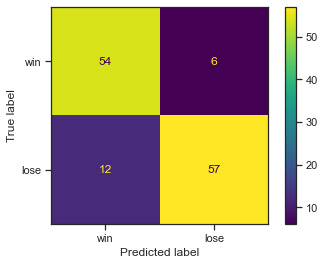

In [9]:
set_label = 'test'
cm =  confusion_matrix(y_true=df.result[df.set==set_label], y_pred=df.result_pred[df.set==set_label])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['win','lose'])
print('Initial model accuracy: %.4f' %get_accuracy(act=df.result[df.set==set_label], pred=df.result_pred[df.set==set_label]))
disp.plot()

### <span style='color:green'> **[done]** </span>GridSearch (=Parameter tuning):

In [10]:
train_index = df.index[df.set=='train']
valid_index = df.index[df.set=='validation']
test_index = df.index[df.set=='test']

grid = {'C':[],
       'train_accuracy':[],
       'valid_accuracy':[],
       'test_accuracy':[]
       }

for c in tqdm([0.01,0.025,0.05,0.075,0.1,0.25,0.5,0.75,1]):
    grid['C'].append(c)
    logistic_reg_clf = set_logistic_reg_clf(X_columns=X, y_columns=y, data=df, penalty='l2', c=c, solver='lbfgs')
    df = set_predictions(data=df,model=logistic_reg_clf, X_columns=X, y_columns=y)
    grid['train_accuracy'].append(get_mean_accuracy(act=df.loc[train_index,'result'], pred=df.loc[train_index,'result_pred']))
    grid['valid_accuracy'].append(get_mean_accuracy(act=df.loc[valid_index,'result'], pred=df.loc[valid_index,'result_pred']))
    grid['test_accuracy'].append(get_mean_accuracy(act=df.loc[test_index,'result'], pred=df.loc[test_index,'result_pred']))
    
grid = grid = pd.DataFrame(data=grid)
grid

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 96.08it/s]


,C,train_accuracy,valid_accuracy,test_accuracy
0,0.010,0.858333,0.807692,0.837209
1,0.025,0.875000,0.846154,0.852713
2,0.050,0.879167,0.846154,0.860465
3,0.075,0.879167,0.846154,0.860465
4,0.100,0.875000,0.846154,0.860465
5,0.250,0.887500,0.865385,0.852713
6,0.500,0.887500,0.865385,0.860465
7,0.750,0.891667,0.865385,0.860465
8,1.000,0.895833,0.865385,0.860465


Text(0, 0.5, 'Accuracy')

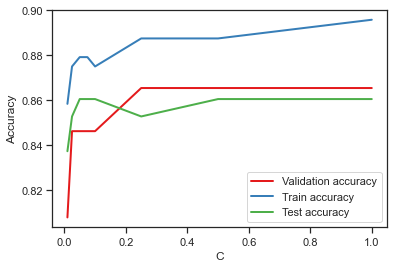

In [11]:
sns.lineplot( data=grid, x='C', y='valid_accuracy', label='Validation accuracy')
#sns.scatterplot( data=grid, x='C', y='valid_accuracy')
sns.lineplot( data=grid, x='C', y='train_accuracy', label='Train accuracy')
#sns.scatterplot( data=grid, x='C', y='train_accuracy')
sns.lineplot( data=grid, x='C', y='test_accuracy', label='Test accuracy')
#sns.scatterplot( data=grid, x='C', y='test_accuracy')
plt.ylabel("Accuracy")

In [12]:
best_model_param = grid.sort_values(by=['valid_accuracy'], ascending=False).reset_index(drop=True)
best_c = best_model_param.iloc[0]['C']
best_model_param.iloc[0]

C                 0.250000
train_accuracy    0.887500
valid_accuracy    0.865385
test_accuracy     0.852713
Name: 0, dtype: float64

Post Parameters Tuning accuracy: 0.8527


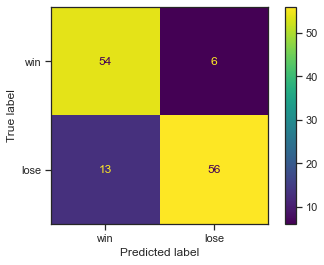

In [13]:
logistic_reg_clf = set_logistic_reg_clf(X_columns=X, y_columns=y, data=df, penalty='l2', c=best_c, solver='lbfgs')
df = set_predictions(data=df,model=logistic_reg_clf, X_columns=X, y_columns=y)

set_label = 'test'
cm =  confusion_matrix(y_true=df.result[df.set==set_label], y_pred=df.result_pred[df.set==set_label])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['win','lose'])
print('Post Parameters Tuning accuracy: %.4f' %get_accuracy(act=df.result[df.set==set_label], pred=df.result_pred[df.set==set_label]))
disp.plot()

#### <span style='color:green'> **[done]** </span> Add predictions to data:

In [14]:
pred_columns = ['result_pred']
pred = df[['date','fighter','opponent'] + pred_columns]
pred.tail(3)

,date,fighter,opponent,result_pred
418,2011-03-03,Takeya Mizugaki,Reuben Duran,lose
419,2011-02-05,Miguel Torres,Antonio Banuelos,win
420,2010-12-04,Nick Pace,Will Campuzano,win


In [15]:
data = pd.read_csv('../data/data_features_outliers_detected.csv')
data = pd.merge(data,pred, on=['date','fighter','opponent'], how='outer')

data.to_csv('../data/data_result_prediction_set.csv', index=None)
print('../data/data_result_prediction_set.csv saved.')
print('result_pred: %s' %data.result_pred.unique())
data.head(3)

../data/data_result_prediction_set.csv saved.
result_pred: [nan 'win' 'lose']


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,result_pred
0,lose,Arnold Allen,Max Holloway,2023-04-15,Featherweight,U-DEC,Unanimous,0.005330,-2.631500,0.013112,-0.003396,0.480496,-0.295218,0.0,-2.441848,-0.607282,-1.221133,0.163857,1.090338,0.647994,5.570234,-1.037795,True,True,NaN
1,lose,Billy Quarantillo,Edson Barboza,2023-04-15,Featherweight,KO/TKO,Knee,-1.341414,-0.090078,0.013112,-0.003396,0.643021,-0.607068,1.1,2.392919,1.126612,1.055353,-1.573881,0.198831,0.276647,0.555992,-2.057352,False,False,NaN
2,lose,Dustin Jacoby,Azamat Murzakanov,2023-04-15,Light Heavyweight,U-DEC,Unanimous,-1.341414,-0.126910,0.013112,-0.003396,-0.186416,-0.814968,0.0,0.510633,-0.854981,0.574761,0.076970,-1.724902,-0.515559,-0.558285,1.001319,False,False,NaN


#### <span style='color:green'> **[done]** </span> Saving model as pickle:

In [16]:
save_trained_model(model=logistic_reg_clf,filename_path='../global_variables/result_pred_' + set_lower_cases(weight) + '_logistic_reg.pkl')

../global_variables/result_pred_bantamweight_logistic_reg.pkl saved.


#### <span style='color:green'> **[done]** </span> saving data:

In [17]:
try:
    df.to_csv('../data/data_result_prediction_set.csv',index=None)
    print('../data/data_result_prediction_set.csv saved.')
except:
    print('error occurs saving ../data/data_result_prediction_set.csv - might be file in use.')

../data/data_result_prediction_set.csv saved.
